### Task 3.1

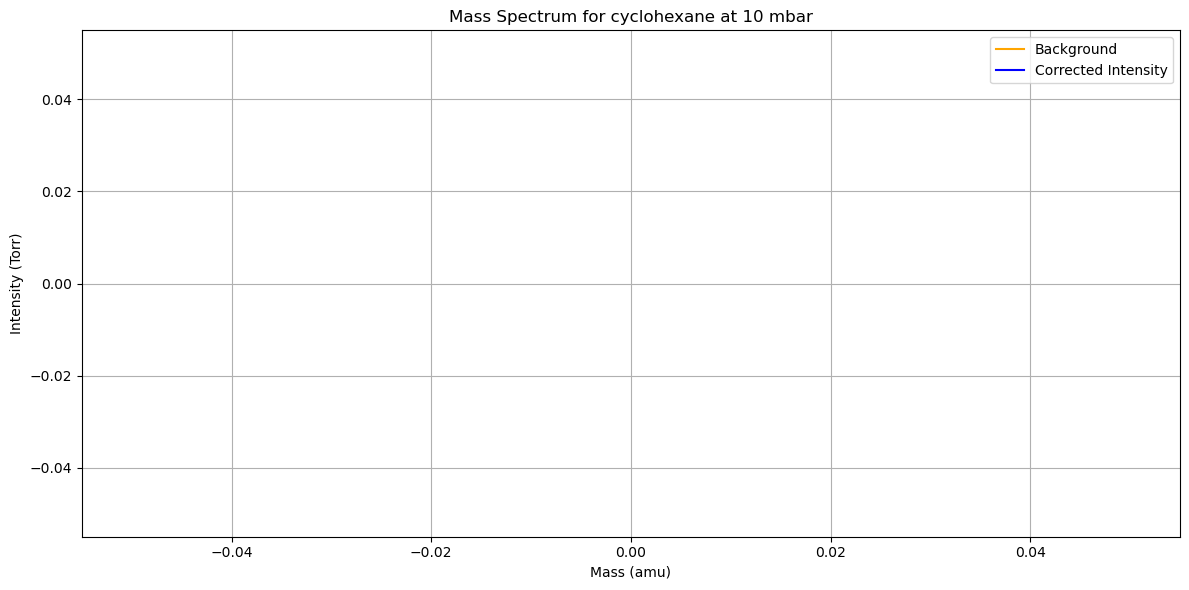

In [1]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO

# URLs to the raw data
data_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/Task%203/R1.txt"
background_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/Task%203/background.txt"

# Function to parse data from a GitHub raw URL
def parse_data_from_url(url):
    response = requests.get(url)
    lines = response.text.splitlines()

    # Find the start of the data block
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.strip().startswith('20.00') or line.strip().startswith(' 1.00'):
            data_start_index = i
            break

    # Parse the actual mass-intensity pairs
    masses = []
    intensities = []
    for line in lines[data_start_index:]:
        parts = line.strip().split(',')
        if len(parts) >= 2:
            try:
                mass = float(parts[0])
                intensity = float(parts[1])
                masses.append(mass)
                intensities.append(intensity)
            except ValueError:
                continue
    return pd.DataFrame({'mass': masses, 'intensity': intensities})

# Load and parse both datasets
data_df = parse_data_from_url(data_url)
background_df = parse_data_from_url(background_url)

# Merge on mass values
merged_df = pd.merge(data_df, background_df, on='mass', how='inner', suffixes=('_data', '_background'))

# Calculate corrected intensity, clip negatives to zero
merged_df['corrected_intensity'] = (merged_df['intensity_data'] - merged_df['intensity_background']).clip(lower=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_df['mass'], merged_df['intensity_background'], color='orange', label='Background')
plt.plot(merged_df['mass'], merged_df['corrected_intensity'], color='blue', label='Corrected Intensity')
plt.xlabel('Mass (amu)')
plt.ylabel('Intensity (Torr)')
plt.title('Mass Spectrum for cyclohexane at 10 mbar')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3.2

### Task 4.1

### Task 4.2